In [98]:
import numpy as np
from numpy.linalg import inv, norm

# xs = fopen('./logistic_x.txt', 'r')
# ys = fopen('./logistic_y.txt', 'r')

with open('./logistic_x.txt', 'r') as xs_file:
    xs = np.array([np.concatenate(([1], [float(xp.strip()) for xp in x.strip().split('  ')])) for x in xs_file.readlines()])

with open('./logistic_y.txt', 'r') as ys_file:
    ys = np.array([int(float(y.strip())) for y in ys_file.readlines()])

print(len(xs))
print(len(ys))


99
99


In [99]:
m = len(xs)
    
def newton_minimize(f, g, h, x0, eps):
    x_prev = x0
    x = x0 - inv(h(x0)).dot(g(x0))

    while norm(x - x_prev) > eps:
        x_prev = x
        x = x - inv(h(x)).dot(g(x))

    return x

def lg(z):
    return 1 / (1 + np.e ** (-z))

def h_t(t, y, x):
    return lg(y * np.dot(t, x))

def loss(t):
    return 1 / m * sum([np.log(1 + np.e ** (-ys[i] * np.dot(t, xs[i]))) for i in range(m)])

print(loss(np.array([0, 0, 0])))

def loss_gradient(t):
    t_len = len(t)
    return np.array([- 1 / m * sum([(1 - h_t(t, ys[i], xs[i])) * ys[i] * xs[i][j] for i in range(m)]) for j in range(t_len)])

# loss_gradient(np.array([1, 1, 1]))

def loss_hessian(t):
    t_len = len(t)
    return np.array(
        [[1 / m * sum([xs[i][k] * xs[i][s] * h_t(t, ys[i], xs[i]) * (1 - h_t(t, ys[i], xs[i]))  for i in range(m)]) for s in range(t_len)] for k in range(t_len)]
    )

# loss_hessian(np.array([1, 1, 1]))

0.69314718056


In [100]:
# test
# a = 5
# b = 10
# f = lambda x: (x[0] - a)**2 + (x[1] - b)**2
# g = lambda x: np.array([2 * (x[0] - a), 2 * (x[1] - b)])
# h = lambda x: np.array([
#     [2*x[0], 0],
#     [0, 2*x[1]]
# ])

# newton_minimize(f, g, h, np.array([0.01, 0.01]), 0.0001)

In [101]:
# def newton_minimize(f, g, h, x0, eps):
t = np.array([0.0,0.0,0.0])
thetas = newton_minimize(loss, loss_gradient, loss_hessian, t, 0.001)

In [102]:
thetas

array([-2.6205116 ,  0.76037154,  1.17194674])

In [103]:
np.dot([1, 1.3432504e+00, -1.3311479e+00], thetas)

-3.1591766713827929

In [104]:
np.dot([1, 1.8205529e+00, -6.3466810e-01], thetas)

-1.9800122041938901

In [105]:
results = [(np.dot(xs[i], thetas), np.sign(np.dot(xs[i], thetas)), ys[i]) for i in range(m)]

In [106]:
trues = [r for r in results if r[1] == r[2]]

In [107]:
len(trues) / len(results)

0.8888888888888888

In [108]:
import matplotlib

In [109]:
%matplotlib inline

In [110]:
import matplotlib.pyplot as plt

In [111]:
import matplotlib.pyplot as plt
import plotly.plotly as py
import plotly.tools as tls

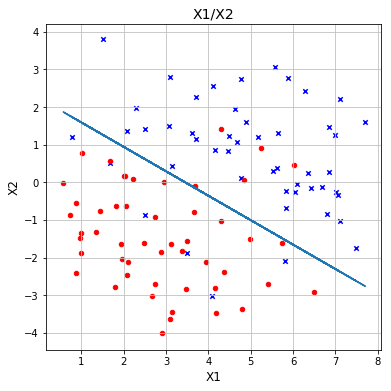

In [113]:
def plot_line(x):
    return (-thetas[0] - thetas[1] * x) / thetas[2];

x1_data = [xs[i] for i in range(m) if ys[i] == 1]
x_minus_1_data = [xs[i] for i in range(m) if ys[i] == -1]
x1_1 = np.array(x1_data)[:,1]
x1_2 = np.array(x1_data)[:,2]

x_minus_11 = np.array(x_minus_1_data)[:,1]
x_minus_12 = np.array(x_minus_1_data)[:,2]

fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(111)
ax.set_title("X1/X2",fontsize=14)
ax.set_xlabel("X1",fontsize=12)
ax.set_ylabel("X2",fontsize=12)
ax.grid(True,linestyle='-',color='0.75')

ax.scatter(x1_1,x1_2,s=20,c='blue', marker='x');

ax.scatter(x_minus_11,x_minus_12,s=20,c='red', marker='o');

x1s = np.array([plot_line(x) for x in xs[:,1]])

plt.plot(xs[:,1], x1s)

plt.show()
